In [101]:
import warnings
warnings.simplefilter('ignore')

from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 14, 14

import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import cartopy.crs as ccrs
import cartopy.mpl.ticker as ticker
import cartopy.io.shapereader as shpreader

from osgeo import gdal

import netCDF4 as nc

import numpy as np
import pandas as pd
import glob

In [2]:
Input_folder = './data'
# 读取所有nc数据
data_list = glob.glob(Input_folder + '/*.tif')
data_list

['./data\\199201_uzb.tif',
 './data\\199202_uzb.tif',
 './data\\199203_uzb.tif',
 './data\\199204_uzb.tif',
 './data\\199205_uzb.tif',
 './data\\199206_uzb.tif',
 './data\\199207_uzb.tif',
 './data\\199208_uzb.tif',
 './data\\199209_uzb.tif',
 './data\\199210_uzb.tif',
 './data\\199211_uzb.tif',
 './data\\199212_uzb.tif']

In [3]:
def readTif(fileName):
    dataset = gdal.Open(fileName)
    im_width = dataset.RasterXSize #栅格矩阵的列数
    im_height = dataset.RasterYSize #栅格矩阵的行数
    print(im_width, im_height)
    im_data = dataset.ReadAsArray(0,0,im_width,im_height)#获取数据
    im =  im_data[0:im_height,0:im_width]#获取蓝波段
    return im

In [4]:
dataset = gdal.Open(data_list[0])
im_width = dataset.RasterXSize #栅格矩阵的列数
im_height = dataset.RasterYSize #栅格矩阵的行数

im_geotrans = dataset.GetGeoTransform()#获取仿射矩阵信息
im_proj = dataset.GetProjection()#获取投影信息
# im =  im_data[0:im_height,0:im_width]#获取蓝波段
im_geotrans

(54.95000076293945,
 0.09999998489228804,
 0.0,
 46.04999923706055,
 0.0,
 -0.09999998489228806)

In [5]:
lons = np.arange(im_geotrans[0], im_geotrans[0]+im_geotrans[1]*im_width, im_geotrans[1])
lats = np.arange(im_geotrans[3], im_geotrans[3]+im_geotrans[5]*im_height, im_geotrans[5])

201 101


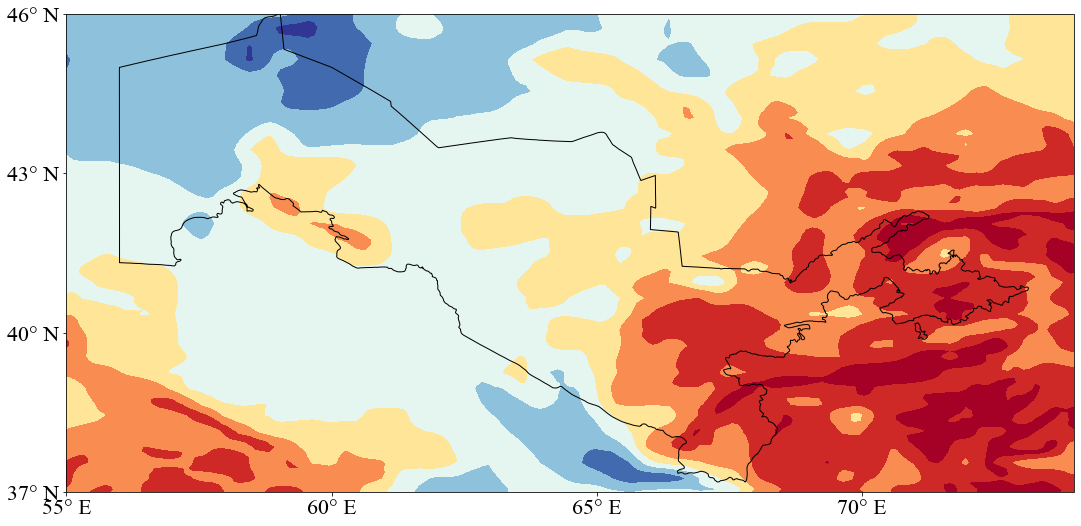

In [178]:
fig2 = plt.figure()
proj = ccrs.PlateCarree(central_longitude=lons[int((len(lons)+1)/2)]) 
#设置一个圆柱投影坐标，中心经度设置在中间位置
leftlon, rightlon, lowerlat, upperlat = (55,74.0001,37,46.0001)
#设置地图边界范围
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
m = Basemap(leftlon,lowerlat,rightlon,upperlat)
x, y = m(*np.meshgrid(lons, lats))

f2_ax1 = fig2.add_axes([0.67, 0.8, 1, 1],projection = proj)
f2_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
# f2_ax1.set_title('(b)',loc='left',fontsize =15)
f2_ax1.set_xticks(np.arange(leftlon,rightlon,5), crs=ccrs.PlateCarree())
f2_ax1.set_yticks(np.arange(lowerlat,upperlat,3), crs=ccrs.PlateCarree())
f2_ax1.xaxis.set_major_formatter(lon_formatter)
f2_ax1.yaxis.set_major_formatter(lat_formatter)

shp = shpreader.Reader("shp/Uzb.shp").geometries()
f2_ax1.add_geometries(shp, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)

c1 = f2_ax1.contourf(x, y, readTif(data_list[0]), zorder=0,extend = 'both',transform=ccrs.PlateCarree(), cmap=plt.cm.RdYlBu)
plt.tick_params(labelsize=22)
fig2.savefig('1.png',dpi=300,bbox_inches='tight')
plt.show()

#### 

In [179]:
import geopandas as gp
import regionmask

shp = gp.read_file("shp/Uzb.shp")
mask = regionmask.mask_geopandas(shp, lons, lats)

def makemask(data):
    return np.ma.masked_array(data, mask=mask)

201 101


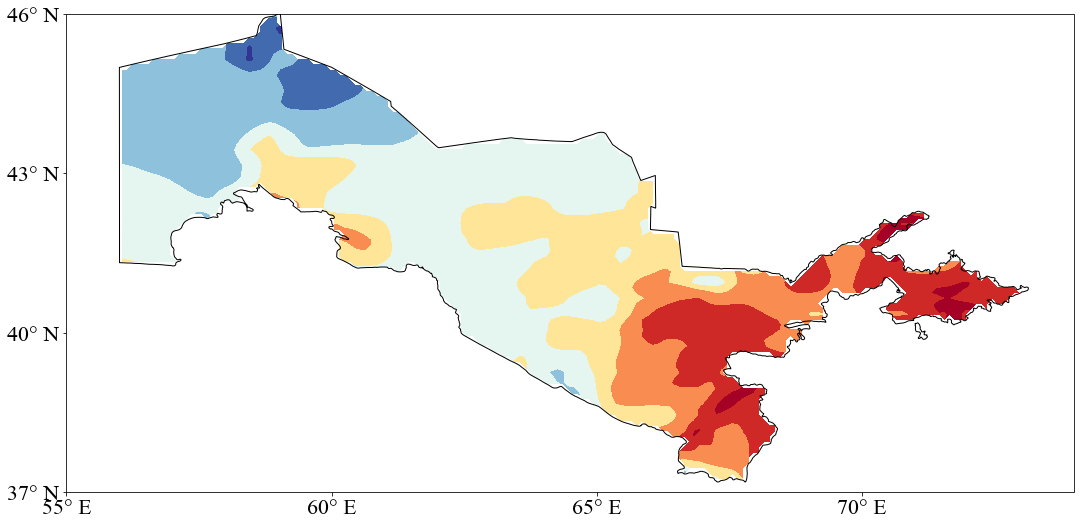

In [180]:
fig2 = plt.figure()
proj = ccrs.PlateCarree(central_longitude=lons[int((len(lons)+1)/2)]) 
#设置一个圆柱投影坐标，中心经度设置在中间位置
leftlon, rightlon, lowerlat, upperlat = (55,74.0001,37,46.0001)
#设置地图边界范围
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
m = Basemap(leftlon,lowerlat,rightlon,upperlat)
x, y = m(*np.meshgrid(lons, lats))

f2_ax1 = fig2.add_axes([0.67, 0.8, 1, 1],projection = proj)
f2_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
# f2_ax1.set_title('(b)',loc='left',fontsize =15)
f2_ax1.set_xticks(np.arange(leftlon,rightlon,5), crs=ccrs.PlateCarree())
f2_ax1.set_yticks(np.arange(lowerlat,upperlat,3), crs=ccrs.PlateCarree())
f2_ax1.xaxis.set_major_formatter(lon_formatter)
f2_ax1.yaxis.set_major_formatter(lat_formatter)

shp = shpreader.Reader("shp/Uzb.shp").geometries()
f2_ax1.add_geometries(shp, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)

c1 = f2_ax1.contourf(x, y,makemask(readTif(data_list[0])), zorder=0,extend = 'both',transform=ccrs.PlateCarree(), cmap=plt.cm.RdYlBu)
plt.tick_params(labelsize=22)
fig2.savefig('2.png',dpi=300,bbox_inches='tight')
plt.show()

In [198]:
def DrawShp(label):
    f2_ax1.set_extent([leftlon, rightlon, lowerlat, upperlat], crs=ccrs.PlateCarree())
    f2_ax1.set_title(label,loc='left',fontsize =50)
    f2_ax1.set_xticks(np.arange(leftlon,rightlon,5), crs=ccrs.PlateCarree())
    f2_ax1.set_yticks(np.arange(lowerlat,upperlat,3), crs=ccrs.PlateCarree())
    f2_ax1.xaxis.set_major_formatter(lon_formatter)
    f2_ax1.yaxis.set_major_formatter(lat_formatter)
    shp = shpreader.Reader("shp/Uzb.shp").geometries()
    f2_ax1.add_geometries(shp, ccrs.PlateCarree(),facecolor='none', edgecolor='black',zorder = 1)
    plt.tick_params(labelsize=40)

    
def DrawTif(data, m):
    clevs = np.linspace(np.nanmin(makemask(readTif(data))),np.nanmax(makemask(readTif(data))),11)
    c1 = f2_ax1.contourf(x, y,makemask(readTif(data)),clevs, zorder=0,extend = 'both',transform=ccrs.PlateCarree(), cmap=plt.cm.RdYlBu)
    
    tick_locator = ticker.MaxNLocator(nbins=2)
    if m == 1:
        cb= fig1.colorbar(c1,cax=cbposition, format='%d')# colorbar上的刻度值个数
    else: cb= fig1.colorbar(c1,cax=cbposition, format='%.2f')# colorbar上的刻度值个数
    cb.locator = tick_locator
    plt.tick_params(labelsize=40)
    cb.set_ticks([np.nanmin(makemask(readTif(data))),np.nanmax(makemask(readTif(data)))])
    
    cb.outline.set_visible(False)
    cb.update_ticks()

201 101
201 101
201 101
201 101
201 101


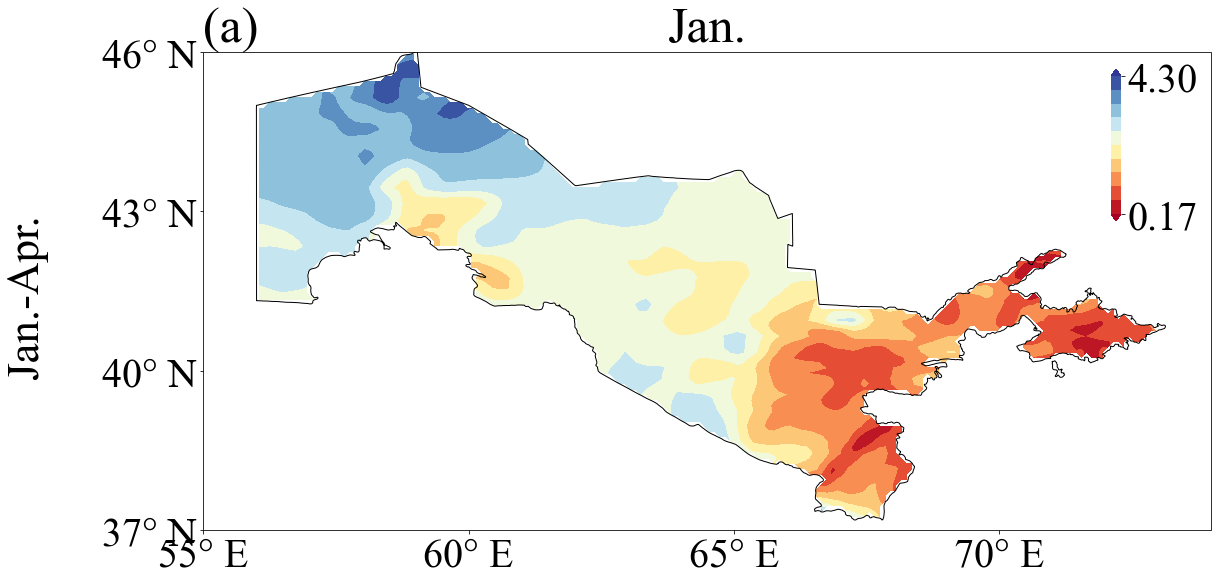

In [199]:
plt.rcParams["font.sans-serif"]=["Times New Roman"] #设置字体

fig1 = plt.figure()
proj = ccrs.PlateCarree(central_longitude=lons[int((len(lons)+1)/2)]) 
#设置一个圆柱投影坐标，中心经度设置在中间位置
leftlon, rightlon, lowerlat, upperlat = (55,74.0001,37,46.0001)
#设置地图边界范围
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
m = Basemap(leftlon,lowerlat,rightlon,upperlat)
x, y = m(*np.meshgrid(lons, lats))


f2_ax1 = fig1.add_axes([0, 1.2, 1, 0.5],projection = proj)
DrawShp("(a)")
plt.ylabel('Jan.-Apr. \n', fontsize=45) # 列title
plt.title('Jan.', fontsize=50) # title

cbposition=fig1.add_axes([0.9,1.52, 0.01, 0.15])
DrawTif(data_list[0],0)
fig2.savefig('3.png',dpi=300,bbox_inches='tight')
plt.show()

201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101
201 101


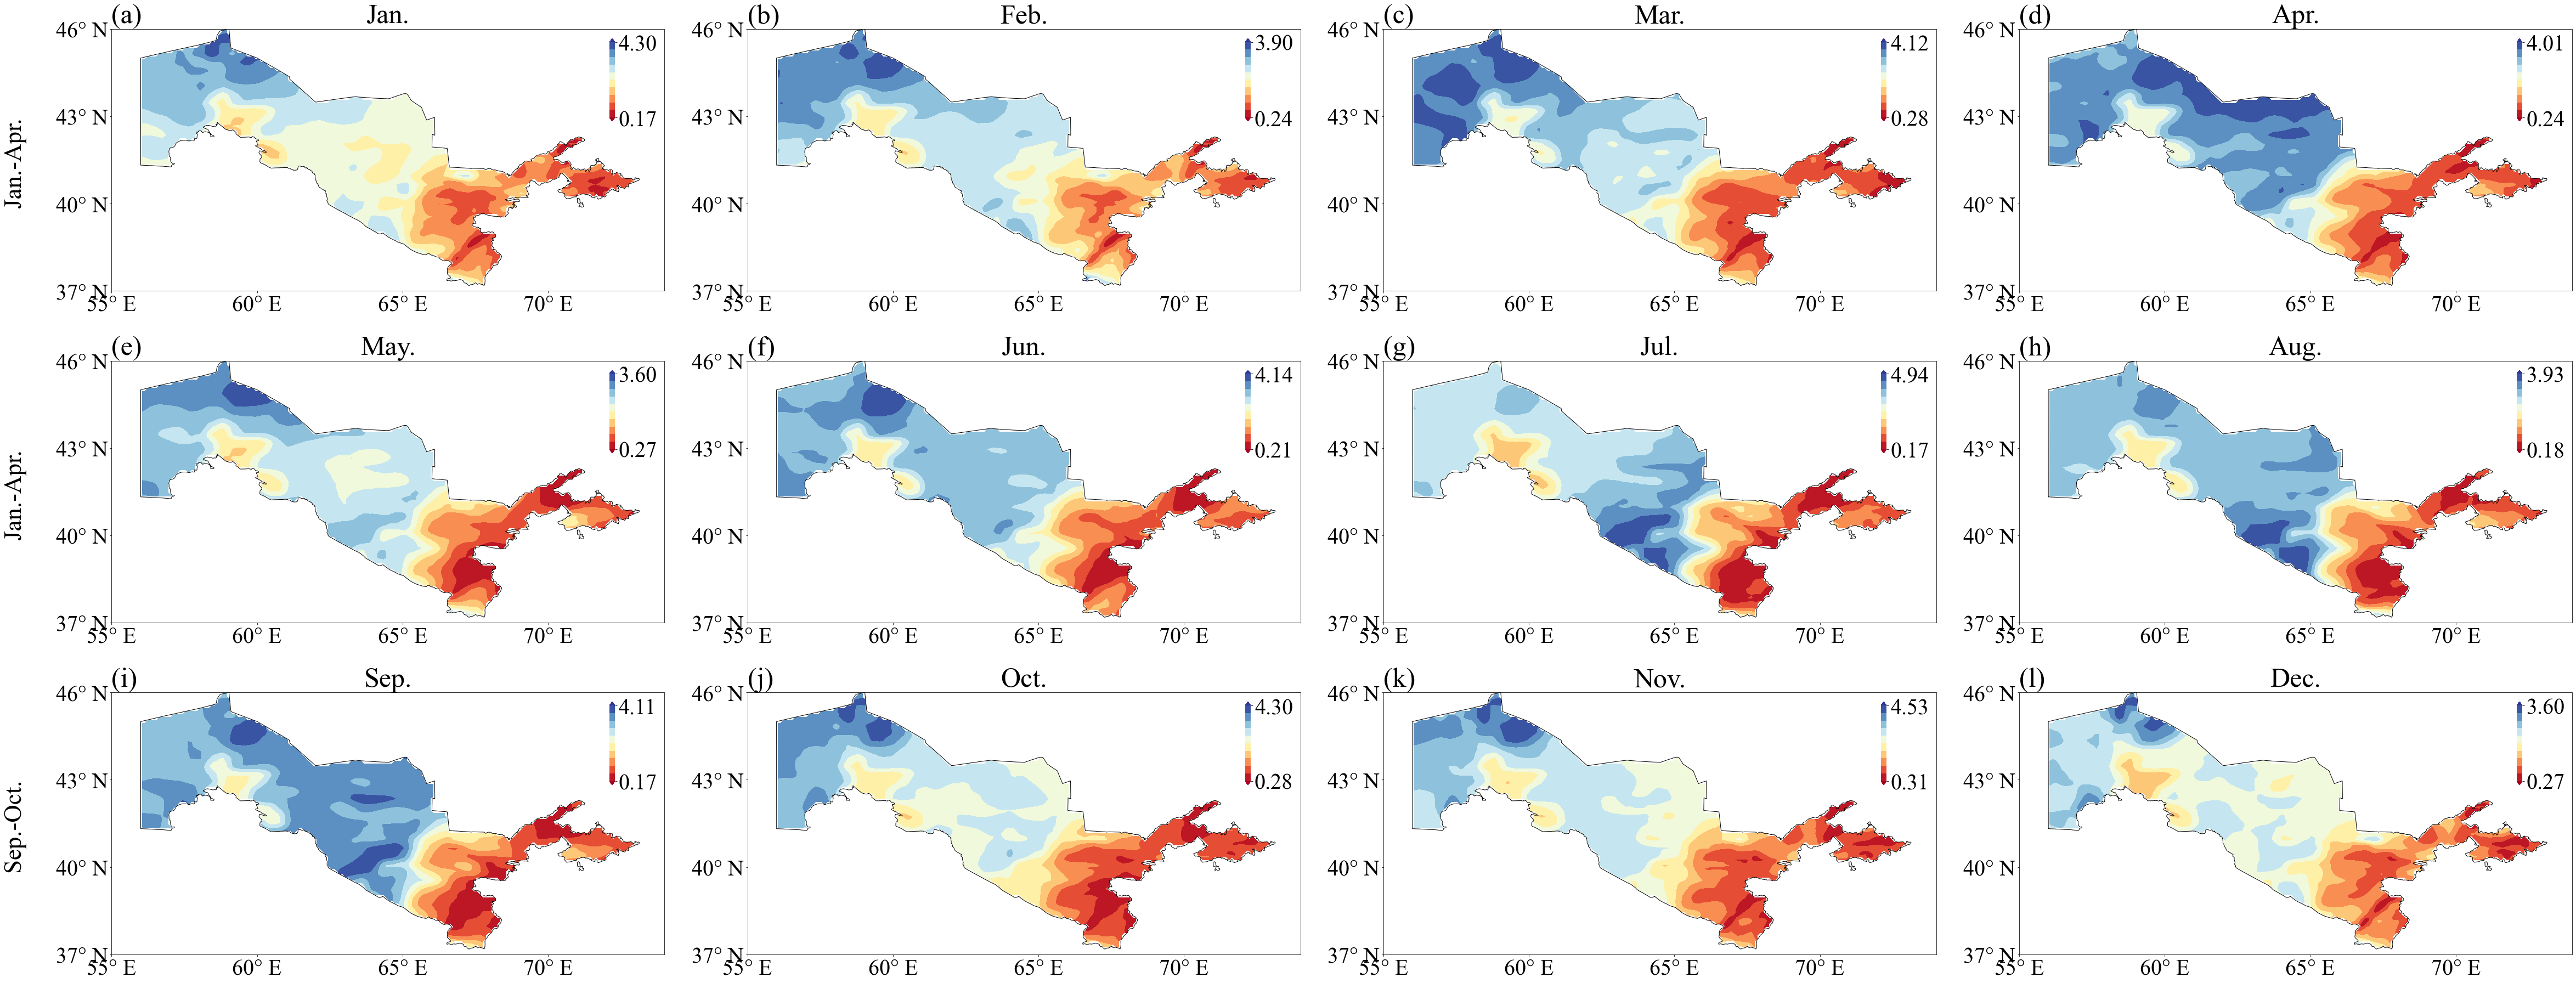

In [205]:
plt.rcParams["font.sans-serif"]=["Times New Roman"] #设置字体
plt.rcParams["axes.unicode_minus"]=False #该语句解决图像中的“-”负号的乱码问题

fig1 = plt.figure()
proj = ccrs.PlateCarree(central_longitude=lons[int((len(lons)+1)/2)]) 
#设置一个圆柱投影坐标，中心经度设置在中间位置
leftlon, rightlon, lowerlat, upperlat = (55,74.0001,37,46.0001)
#设置地图边界范围
lon_formatter = cticker.LongitudeFormatter()
lat_formatter = cticker.LatitudeFormatter()
m = Basemap(leftlon,lowerlat,rightlon,upperlat)
x, y = m(*np.meshgrid(lons, lats))


f2_ax1 = fig1.add_axes([0, 1.2, 1, 0.5],projection = proj)
DrawShp("(a)")
plt.ylabel('Jan.-Apr. \n', fontsize=45) # 列title
plt.title('Jan.', fontsize=50) # title
cbposition=fig1.add_axes([0.9,1.52, 0.01, 0.15])
DrawTif(data_list[0],0)


f2_ax1 = fig1.add_axes([1.15, 1.2, 1, 0.5],projection = proj)
DrawShp("(b)")
plt.title('Feb.', fontsize=50) # title
cbposition=fig1.add_axes([2.05,1.52, 0.01, 0.15])
DrawTif(data_list[1],0)


f2_ax1 = fig1.add_axes([2.3, 1.2, 1, 0.5],projection = proj)
DrawShp("(c)")
plt.title('Mar.', fontsize=50) # title
cbposition=fig1.add_axes([3.2,1.52, 0.01, 0.15])
DrawTif(data_list[2],0)


f2_ax1 = fig1.add_axes([3.45, 1.2, 1, 0.5],projection = proj)
DrawShp("(d)")
plt.title('Apr.', fontsize=50) # title
cbposition=fig1.add_axes([4.35,1.52, 0.01, 0.15])
DrawTif(data_list[3],0)


f2_ax1 = fig1.add_axes([0, 0.6, 1, 0.5],projection = proj)
DrawShp("(e)")
plt.ylabel('Jan.-Apr. \n', fontsize=45) # 列title
plt.title('May.', fontsize=50) # title
cbposition=fig1.add_axes([0.9,0.92, 0.01, 0.15])
DrawTif(data_list[4],0)


f2_ax1 = fig1.add_axes([1.15, 0.6, 1, 0.5],projection = proj)
DrawShp("(f)")
plt.title('Jun.', fontsize=50) # title
cbposition=fig1.add_axes([2.05,0.92, 0.01, 0.15])
DrawTif(data_list[5],0)


f2_ax1 = fig1.add_axes([2.3, 0.6, 1, 0.5],projection = proj)
DrawShp("(g)")
plt.title('Jul.', fontsize=50) # title
cbposition=fig1.add_axes([3.2,0.92, 0.01, 0.15])
DrawTif(data_list[6],0)


f2_ax1 = fig1.add_axes([3.45, 0.6, 1, 0.5],projection = proj)
DrawShp("(h)")
plt.title('Aug.', fontsize=50) # title
cbposition=fig1.add_axes([4.35,0.92, 0.01, 0.15])
DrawTif(data_list[7],0)


f2_ax1 = fig1.add_axes([0, 0, 1, 0.5],projection = proj)
DrawShp("(i)")
plt.ylabel('Sep.-Oct. \n', fontsize=45) # 列title
plt.title('Sep.', fontsize=50) # title
cbposition=fig1.add_axes([0.9,0.32, 0.01, 0.15])
DrawTif(data_list[8],0)


f2_ax1 = fig1.add_axes([1.15, 0, 1, 0.5],projection = proj)
DrawShp("(j)")
plt.title('Oct.', fontsize=50) # title
cbposition=fig1.add_axes([2.05,0.32, 0.01, 0.15])
DrawTif(data_list[9],0)


f2_ax1 = fig1.add_axes([2.3, 0, 1, 0.5],projection = proj)
DrawShp("(k)")
plt.title('Nov.', fontsize=50) # title
cbposition=fig1.add_axes([3.2,0.32, 0.01, 0.15])
DrawTif(data_list[10],0)


f2_ax1 = fig1.add_axes([3.45, 0, 1, 0.5],projection = proj)
DrawShp("(l)")
plt.title('Dec.', fontsize=50) # title
cbposition=fig1.add_axes([4.35,0.32, 0.01, 0.15])
DrawTif(data_list[11],0)

fig1.savefig('4.png',dpi=300,bbox_inches='tight')
plt.show()

In [61]:
len(lons)/len(lats)

1.99009900990099